In [108]:
! pip install sentencepiece

Looking in indexes: https://pypi.org/simple, http://rd-brn-ch-h2.bic.local:9292/simple/
     |████████████████████████████████| 1.1MB 1.5MB/s eta 0:00:01


In [109]:
import sentencepiece as spm

#### Notes:
- smiley in text could be potentially very predictive. Same as number of !!!, !? ?! and ...
- there are html tags in the text
- there is review text and review summary, both might be useful
- we predict the review score
- we should evaluate correlation between review usefulness and review score, possible feature
- if users review a lot they can be very critical person, user ID can be also an predictive feature
- helpfulness should be kept along with it's numerator and denominator to model scale of rating, in case it is also a feauture (24/24 vs 1/1 might mean something)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## Read records

In [2]:
DATA='/Users/matejkvassay/data/s.txt'
ENCODING='iso-8859-1'

In [3]:
def parse_line(line):
    splitted_line=line.split(':')
    return {splitted_line[0]:':'.join(splitted_line[1:]).strip()}

def read_dataset(path):
    records=[]
    with open(path, 'rb') as f:
        current_record={}
        first=True
        for x in f.readlines():
            line=x.decode(ENCODING)
            if line.startswith('product/'):
                if not first:
                    records.append(current_record)
                first=False
                current_record=parse_line(line)
                continue
            if line.startswith('review/'):
                current_record.update(parse_line(line))
    return records

In [4]:
%%time
records=read_dataset(DATA)

CPU times: user 8.32 s, sys: 833 ms, total: 9.15 s
Wall time: 9.68 s


In [35]:
records[0]

{'product/productId': 'B001E4KFG0',
 'review/userId': 'A3SGXH7AUHU8GW',
 'review/profileName': 'delmartian',
 'review/helpfulness': '1/1',
 'review/score': '5.0',
 'review/time': '1303862400',
 'review/summary': 'Good Quality Dog Food',
 'review/text': 'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'}

## Analyze & normalize data

In [13]:
df=pd.DataFrame(records)

#### Review score
(prediction target)

In [14]:
df['review/score'].describe()

count     568453
unique         5
top          5.0
freq      363121
Name: review/score, dtype: object

5.0    363121
4.0     80655
1.0     52268
3.0     42640
2.0     29769
Name: y, dtype: int64


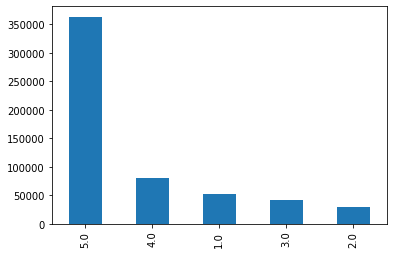

In [68]:
df['y']=df['review/score'].astype(float)
print(df['y'].value_counts())
df['y'].value_counts().plot.bar()

1.0    443776
0.0    124677
Name: y_bin, dtype: int64


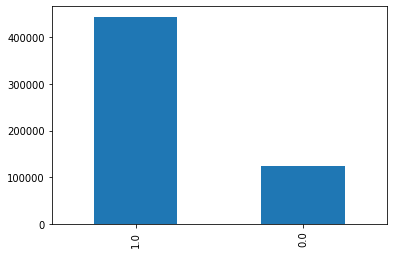

In [90]:
df['y_bin']=df['y'].apply(lambda x: 1.0 if x>3 else 0.0)
print(df['y_bin'].value_counts())
df['y_bin'].value_counts().plot.bar()

### Text

'Great Snacks'